In [12]:
import pandas as pd
from IPython.display import display # to display multiple outputs in single cell
import seaborn as sns # plot visualisation 
import matplotlib.pyplot as plt

### Introduction
The dataset was obtained from kaggle titled 'Gun Deaths in America - CDC'. It contains in-depth look at gun-related deaths in the United States from 2012 to 2014, provided by the Centers for Disease Control and Prevention CDC. The list of variables included are:

Features:

    Year: The year when the death occurred, providing a temporal context.
    Month: The month of the incident, adding more granularity to the timeline.
    Intent: Categorizes the death by intent, such as suicide or homicide, essential for understanding the circumstances.
    Police: Indicates whether a police officer was involved in the death.
    Sex: The gender of the deceased, crucial for demographic analysis.
    Age: The age of the deceased, providing insights into age-related trends.
    Race: The race of the deceased, essential for understanding racial disparities.
    Place: The location of the incident, such as home or street, which can influence the context of the death.
    Education: Educational background of the deceased, offering a socio-economic dimension.



The purpose of this analysis is to examine which features contribute to the gun-related deaths in the United States during the period. Prior to analysis, the dataset 
is wrangled and cleaned. 

### Preprocessing Stage
#### Data Wrangling

In [2]:
usgun_df = pd.read_csv("gun_deaths.csv")
display(usgun_df.head())
display(usgun_df.tail())

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


,year,month,intent,police,sex,age,race,place,education
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS
100797,2014,10,Homicide,0,M,43.0,Black,Other unspecified,HS/GED


In [3]:
display(usgun_df.describe())
display(usgun_df.describe(include=['O']))


,year,month,police,age
count,100798.000000,100798.000000,100798.000000,100780.000000
mean,2013.000357,6.567601,0.013909,43.857601
std,0.816278,3.405609,0.117114,19.496181
min,2012.000000,1.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,27.000000
50%,2013.000000,7.000000,0.000000,42.000000
75%,2014.000000,9.000000,0.000000,58.000000
max,2014.000000,12.000000,1.000000,107.000000


,intent,sex,race,place,education
count,100797,100798,100798,99414,99376
unique,4,2,5,10,4
top,Suicide,M,White,Home,HS/GED
freq,63175,86349,66237,60486,42927


In [4]:
usgun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


To summarise the numerical features, it seems fine. However, might want to take a closer look at age. With maximum age 107 years old. Would like to clarify. 
Objects (categorical) are also fine. WIth missing values, blank spaces are prevalent for place and education features. Further inspect:

C:\Users\KT\AppData\Local\Temp\ipykernel_13620\2055045959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(usgun_df, x="intent", palette="bright").set(title = 'Intent (Count)')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


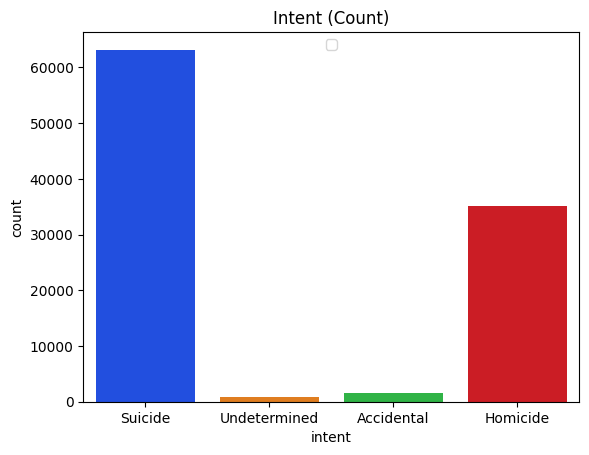

In [15]:
sns.countplot(usgun_df, x="intent", palette="bright").set(title = 'Intent (Count)')